# Chi-Squared Test and Proportion Z-test

| Feature                  | **Chi-squared Test**                                                                                                           | **Two-proportion Z-test**                                                                           |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------- |
| **Purpose**              | Tests **independence** or **association** between categorical variables (e.g. treatment vs outcome)                            | Tests if **two proportions** are significantly different (e.g. conversion rate A vs B)              |
| **Data structure**       | Typically works with a **contingency table** (counts in each category)                                                         | Works with **two proportions** calculated from binary outcomes                                      |
| **Null hypothesis (H₀)** | The two variables are **independent** (no difference in proportions)                                                           | The proportions are **equal**, ( p_1 = p_2 )                                                        |
| **Test statistic**       | ( \chi^2 = \sum \frac{(O - E)^2}{E} ), where O = observed, E = expected counts                                                 | ( z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{p(1-p)(1/n_1 + 1/n_2)}} ), where ( p ) = pooled proportion |
| **Distribution used**    | Chi-squared distribution                                                                                                       | Normal distribution (Z)                                                                             |
| **When to use**          | For **more than two groups** or general association tests                                                                      | Specifically for **two groups** comparing proportions                                               |
| **Equivalence**          | For 2×2 tables, the chi-squared test is **mathematically equivalent** to the two-proportion z-test (without Yates correction). |                                                                                                     |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.stats.proportion import proportions_ztest

# conversions and sample sizes
successes = np.array([120, 150])
n = np.array([1000, 1000])

z_stat, p_val = proportions_ztest(successes, n)
print(f"Z-statistic = {z_stat:.3f}, p-value = {p_val:.3f}")

Z-statistic = -1.963, p-value = 0.050


In [3]:
from scipy.stats import chi2_contingency

# build 2x2 contingency table
table = np.array([[120, 1000 - 120],
                  [150, 1000 - 150]])

chi2, p_val, dof, expected = chi2_contingency(table, correction=False)
print(f"Chi2 = {chi2:.3f}, p-value = {p_val:.3f}")

Chi2 = 3.854, p-value = 0.050


In [4]:
print(f"Z^2 = {z_stat**2:.3f}")
print(f"Chi2 = {chi2:.3f}")

Z^2 = 3.854
Chi2 = 3.854


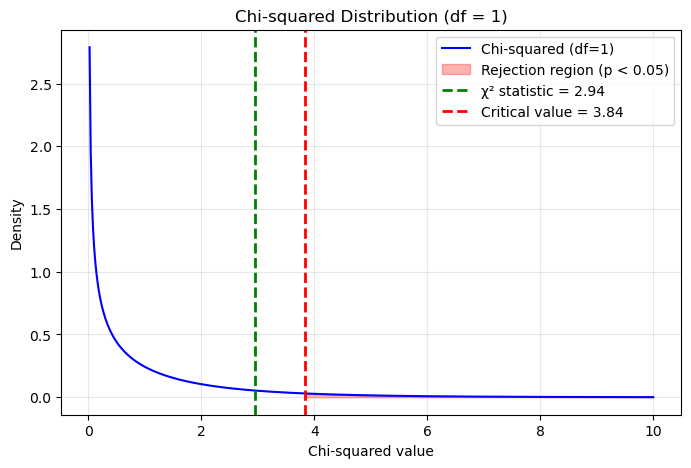

In [9]:

from scipy.stats import chi2
# Chi-squared test statistic (from example)
chi2_stat = 2.941  # approximate example value (from proportions test example)
df = 1  # degrees of freedom for 2x2 table

# Significance threshold for p = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

# Range for x-axis
x = np.linspace(0, 10, 500)
y = chi2.pdf(x, df)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'Chi-squared (df={df})', color='blue')
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label=f'Rejection region (p < 0.05)')

# Add test statistic
plt.axvline(chi2_stat, color='green', linestyle='--', linewidth=2, label=f'χ² statistic = {chi2_stat:.2f}')
plt.axvline(critical_value, color='red', linestyle='--', linewidth=2, label=f'Critical value = {critical_value:.2f}')

plt.title('Chi-squared Distribution (df = 1)')
plt.xlabel('Chi-squared value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

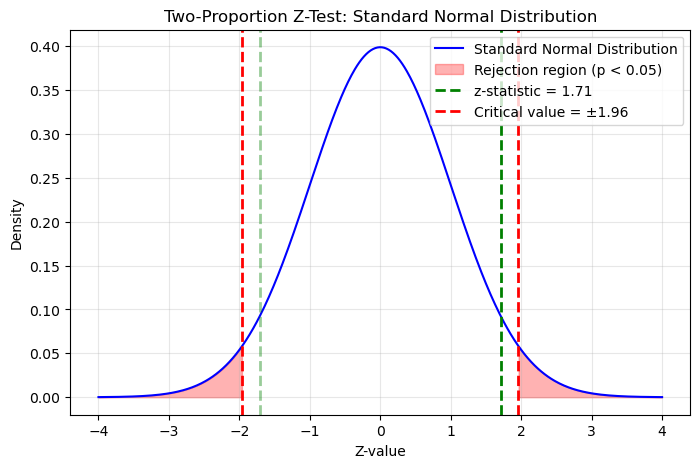

In [11]:
from scipy.stats import norm

# Z-test statistic from example (approx)
z_stat = 1.714  # corresponds roughly to chi2_stat = 2.94 (since 1.714^2 ≈ 2.94)
alpha = 0.05

# Critical value for two-tailed test
z_critical = norm.ppf(1 - alpha/2)

# Range for x-axis
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade rejection regions
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3, label='Rejection region (p < 0.05)')
plt.fill_between(x, y, where=(x <= -z_critical), color='red', alpha=0.3)

# Add test statistic line
plt.axvline(z_stat, color='green', linestyle='--', linewidth=2, label=f'z-statistic = {z_stat:.2f}')
plt.axvline(-z_stat, color='green', linestyle='--', linewidth=2, alpha=0.4)

# Add critical value lines
plt.axvline(z_critical, color='red', linestyle='--', linewidth=2, label=f'Critical value = ±{z_critical:.2f}')
plt.axvline(-z_critical, color='red', linestyle='--', linewidth=2)

plt.title('Two-Proportion Z-Test: Standard Normal Distribution')
plt.xlabel('Z-value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
